# Linear & Polynomial Regression

In this notebook, we will use the 3rd-order polynomial model:

$$y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \varepsilon, ~~ \varepsilon \sim \text{N}(0, \sigma^2).$$

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Polynomial coefficients
beta0 = 1
beta1 = -2
beta2 = 6
beta3 = -1

# Standard deviation of epsilon (noise)
sigma = 3

# Other parameters that we will use throughout
x_min = 0
x_max = 6

# Define our polynomial
def p(x):
    return beta0 + beta1 * x + beta2 * x**2 + beta3 * x**3

# Convenience function to sample from a given function f
def sample(f, n, sigma, x_min = 0, x_max = 1, seed = None):    
    np.random.seed(seed)
    X   = np.random.uniform(x_min, x_max, size = (n,1))
    eps = np.random.normal(0, sigma, size = (n,1))
    y = f(X) + eps
    return X, y

# Define a plotting function, for convenience
def plot(f, x_min, x_max, color = 'red', n_points = 1000):
    x = np.linspace(x_min, x_max, n_points).reshape(-1,1)
    y = f(x)
    plt.plot(x,y, color = color)

# Generate dataset and plot datapoints
X_train, y_train = sample(p, 60, sigma, x_min, x_max, seed = 2022)
X_test, y_test = sample(p, 40, sigma, x_min, x_max, seed = 5106)

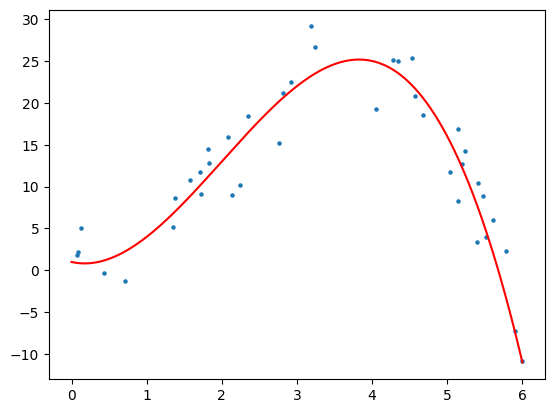

In [2]:
plt.scatter(X_test, y_test, s = 5)
plot(p, x_min, x_max)

### 1. Fit a linear regression model and compute the train and test MSE. 

You may use the following code to initialize your linear regression model.  Import other functions from sklearn as required.

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [103]:
from sklearn.metrics import mean_squared_error

reg.fit(X_train, y_train)

# Train MSE
mse_train = mean_squared_error(y_train, reg.predict(X_train))

# Test MSE
mse_test  = mean_squared_error(y_test, reg.predict(X_test))

print(f'Train MSE: {mse_train}')
print(f'Test  MSE: {mse_test}')

Train MSE: 84.35582301999685
Test  MSE: 88.11990084092439


The following cell plots the predictions of the linear regression model along with the test data.

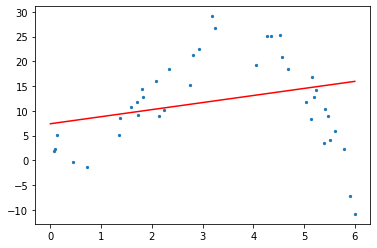

In [104]:
plt.scatter(X_test,y_test, s = 5)
plot(reg.predict, x_min, x_max)

A regression model of order $k$ includes features $(x, x^2, \cdots, x^k)$, i.e., 
$\hat y=\beta_0+\beta_1x+\beta_2x^2+\cdots+\beta_k x^k$.

The following code initializes a regression model of order $2$ that can be used like the model above (so it has ```fit``` and ```predict``` methods).

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

k = 2
reg = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())

### 2. Fit a regression model of order 2, plot the model predictions, and report the train and test MSE.  


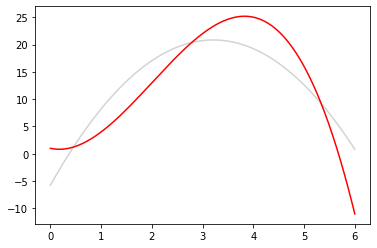

In [106]:
from matplotlib import pyplot as plt

reg.fit(X_train, y_train)

plot(reg.predict, x_min, x_max, color = 'lightgrey')

plot(p, x_min, x_max)

In [107]:
from sklearn.metrics import mean_squared_error

# Train MSE
mse_train = mean_squared_error(y_train, reg.predict(X_train))

# Test MSE
mse_test  = mean_squared_error(y_test, reg.predict(X_test))

print(f'Train MSE: {mse_train}')
print(f'Test  MSE: {mse_test}')

Train MSE: 26.989318066311977
Test  MSE: 28.954082315803923


### 3. For $k=1,2,3,\cdots, 8$, fit a regression model of order $k$, and compute the training and test MSE. Store the train and test MSEs in a dataframe called ```mse_df```. 


```mse_df``` is initialized for you below.

In [108]:
import pandas as pd

k_range = range(1,9)
mse_df = pd.DataFrame(index = k_range, columns = ['Train', 'Test'])

In [109]:
def reg_mse(k, X_train, y_train, X_test, y_test, print_output = False):
    reg = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())
    reg.fit(X_train, y_train)
    
    # Training MSE
    mse_train = mean_squared_error(y_train, reg.predict(X_train))

    # Test MSE
    mse_test  = mean_squared_error(y_test, reg.predict(X_test))
    
    return mse_train, mse_test
    
for k in k_range:
    mse_train, mse_test = reg_mse(k, X_train, y_train, X_test, y_test)
    mse_df['Train'][k] = mse_train
    mse_df['Test'][k] = mse_test

mse_df

,Train,Test
1,84.355823,88.119901
2,26.989318,28.954082
3,7.747259,9.940299
4,7.72393,10.146003
5,6.184112,12.484895
6,6.105312,12.293264
7,6.038453,13.080203
8,5.736869,15.820428


### 4. Plot the training and test MSE curves against $k$ for $k$ = 1,2,...,8. Comment on the curves. 


<AxesSubplot:>

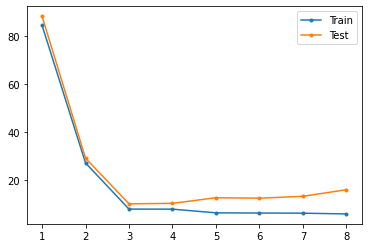

In [110]:
mse_df.plot(marker = '.')

**Comment**: 

When k is less than 3, training and test MSE both decrease drastically as the order increases, indicating that the model is underfitting in this range; When k is between 3 and 4, training and test MSE curve reach a plateau; When k is between 4 and 8, training MSE decreases while test MSE increases as the order increases. 

Let's take a closer look at why the test error gets worse as the order increases.

### 5. Train an order 8 model on 10 datasets, and plot the predictions on the same plot.



The code for generating the datasets is already included. Complete the rest of the code. Refer to Notebook 1 as a guide. 

You do not need to split the dataset further into train and test sets. You may assume the 10 generated dataset are new training sets.

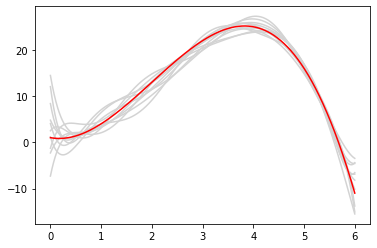

In [111]:
k = 8

for i in range(10):
    X, y = sample(p, 60, sigma, x_min, x_max)
    
    reg = make_pipeline(PolynomialFeatures(degree=k), LinearRegression())    
    reg.fit(X, y)

    plot(reg.predict, x_min, x_max, color = 'lightgrey')   
    
plot(p, x_min, x_max)

We now compare linear and polynomial regression to $k$-nearest neighbours.

### 6. For $k = 1,2,...20$, fit $k$-nearest neighbours models and plot the train and test MSE curves.


In [112]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

# Convenience function to fit k-NN and compute train and test errors
def knn_mse(k, X_train, y_train, X_test, y_test, print_output = False):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)

    # Training MSE
    mse_train = mean_squared_error(y_train, knn.predict(X_train))

    # Test MSE
    mse_test  = mean_squared_error(y_test, knn.predict(X_test))

    if print_output:
        print(f'k = {k}')
        print(f'Train MSE: {mse_train}')
        print(f'Test  MSE: {mse_test}')
    
    return mse_train, mse_test
    
k_range = range(1,21)
mse_df = pd.DataFrame(index = k_range, columns = ['Train', 'Test'])

for k in k_range:
    mse_train, mse_test = knn_mse(k, X_train, y_train, X_test, y_test)
    mse_df['Train'][k] = mse_train
    mse_df['Test'][k] = mse_test

mse_df

,Train,Test
1,0.0,21.953175
2,4.492648,19.439498
3,5.050662,18.307242
4,5.894131,17.907069
5,5.886999,16.762922
6,6.362769,15.910297
7,7.505435,15.964299
8,8.399384,15.089522
9,9.610223,15.996677
10,9.993823,16.42534


<AxesSubplot:>

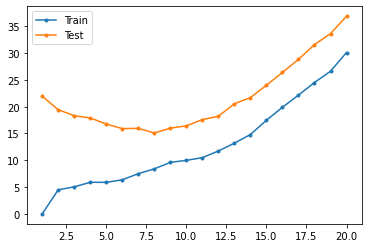

In [113]:
mse_df.plot(marker = '.')

### 7. Look at the train and test MSE curves for polynomial regression and nearest neighbours, and fill in the blanks below.


For polynomial regression, as the order $k$ increases, the model becomes __more__ complex.

For nearest neighbours, as the number of neighbours $k$ increases, the model becomes __less__ complex.